In [1]:
import os
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
path_blood = os.path.join('images', 'blood', 'data_blood.csv')
path_good = os.path.join('images', 'good', 'data_good.csv')

df_blood = pd.read_csv(path_blood)
df_blood['label'] = 1
# print(df_blood)
df_good = pd.read_csv(path_good)
df_good['label'] = 0
# print(df_data)
df_data = pd.concat([df_blood, df_good], ignore_index=True)
df_features = df_data.loc[:, df_data.columns != 'label']

In [4]:
len(df_data[df_data['label'] == 0])

28

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_features.values, \
                                                    df_data['label'].values, test_size=0.33, random_state=42)

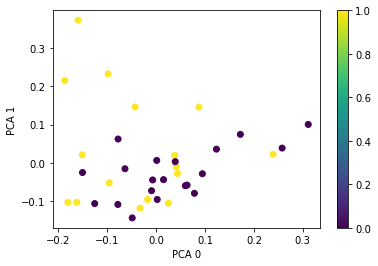

In [7]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_train)
plt.scatter(components[:, 0], components[:, 1], c = y_train)
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
# plt.legend()
plt.colorbar()
plt.show()
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

In [8]:
clf = KNeighborsClassifier(n_neighbors=3).fit(pca_train, y_train)
y_hat = clf.predict(pca_test)
clf.score(pca_test, y_test)

0.5555555555555556

In [9]:
y_hat

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [10]:
accuracy_score(y_test, y_hat)

0.5555555555555556